In [28]:
import tensorflow as tf
from tensorflow import keras
# import Keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
len(X_train)

60000

In [6]:
X_train[0].shape

(28, 28)

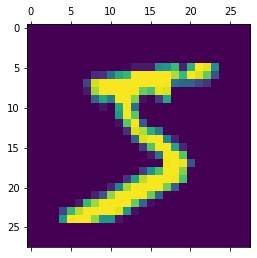

In [10]:
plt.matshow(X_train[0])

In [11]:
y_train[0]

5

In [12]:
X_train.shape

(60000, 28, 28)

In [31]:
X_train = X_train / 255
X_test = X_test / 255

Flattening (60000, 28, 28) ----------------->   (60000, 784)

In [32]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_train_flattened.shape

(60000, 784)

Sequential means I am having stack of layers in my neural network

Sparse_Categorical_Crossentropy -> Our Labels are Numerical

Crossentropy -> For OneHotVector

In [33]:
model = keras.Sequential([
                  keras.layers.Dense(
                      output_shape = 10,
                      input_shape = (784,),
                      activation = 'sigmoid') #input shape should be tuple not int
])

model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(X_train_flattened, y_train, epochs = 5) #here training happens 

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4694 - accuracy: 0.8767
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3036 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2835 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2733 - accuracy: 0.9230
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2662 - accuracy: 0.9259


In [34]:
#Evaluate Accuracy on test dataset
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2672 - accuracy: 0.9260


[0.2671859860420227, 0.9259999990463257]

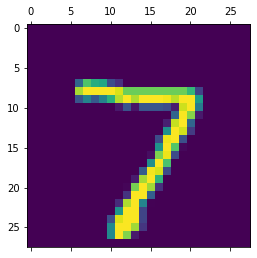

In [35]:
#Prediction
plt.matshow(X_test[0])

In [37]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0] #Last Output Layer outputs -> print max of all

array([2.8137565e-02, 3.5291438e-07, 7.4181557e-02, 9.4556475e-01,
       1.5864968e-03, 1.1960420e-01, 1.7060494e-06, 9.9980652e-01,
       1.0287288e-01, 7.1600217e-01], dtype=float32)

In [38]:
np.argmax(y_predicted[0])

7

In [39]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [40]:
#Confusion Matrix

cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    1,    1,    0,    5,    6,    3,    2,    0],
       [   0, 1115,    4,    1,    0,    2,    4,    2,    7,    0],
       [   5,    7,  935,   13,    7,    3,   13,   10,   34,    5],
       [   2,    0,   25,  892,    0,   41,    2,   14,   28,    6],
       [   2,    2,    7,    0,  910,    0,   10,    5,    9,   37],
       [  10,    2,    2,   21,    9,  787,   17,    5,   32,    7],
       [  10,    3,    6,    1,    7,   10,  916,    2,    3,    0],
       [   1,    5,   24,    2,    5,    0,    0,  961,    2,   28],
       [   8,   10,    7,   14,    9,   26,   10,   14,  865,   11],
       [  11,    7,    1,    7,   24,    7,    0,   30,    5,  917]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

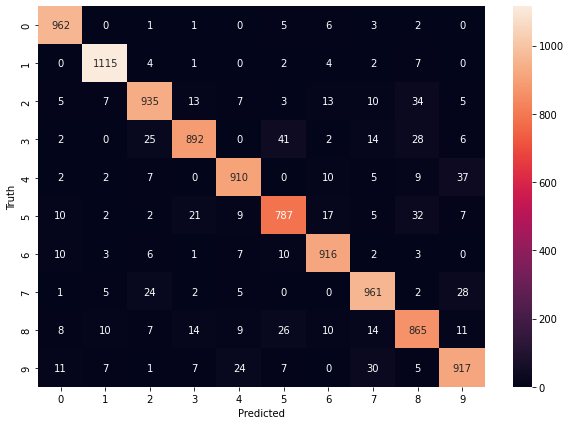

In [41]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

##Adding Hidden Layer

In [44]:
model = keras.Sequential([
                  keras.layers.Dense(100, input_shape = (784,), activation = 'relu'), #input shape should be tuple not int ONLY Give it in first layer... later it will understand itself, second line is optional to give the input shape
                  keras.layers.Dense(10, input_shape = (100,), activation = 'sigmoid')
])

model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(X_train_flattened, y_train, epochs = 5) #here training happens 

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2776 - accuracy: 0.9217
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1269 - accuracy: 0.9625
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0878 - accuracy: 0.9744
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0661 - accuracy: 0.9799
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0517 - accuracy: 0.9846


In [45]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0954 - accuracy: 0.9715


[0.09541551768779755, 0.9714999794960022]

Text(69.0, 0.5, 'Truth')

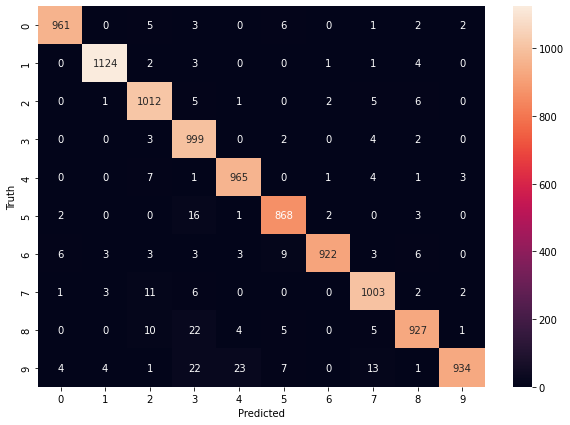

In [48]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

#Confusion Matrix
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)

#Plot Confusion Matrix
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

##Flattening in Keras

In [52]:
model = keras.Sequential([
                  keras.layers.Flatten(input_shape = (28,28)),  #input shape should be tuple not int ONLY Give it in first layer... later it will understand itself, second line is optional to give the input shape      
                  keras.layers.Dense(100, activation = 'relu'), 
                  keras.layers.Dense(10,  activation = 'sigmoid')
])

model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(X_train, y_train, epochs = 5) #here training happens DIDNT PASS THE FLATTENED INPUT

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2776 - accuracy: 0.9201
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1273 - accuracy: 0.9620
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0892 - accuracy: 0.9729
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0691 - accuracy: 0.9791
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0538 - accuracy: 0.9833
